# Problem Statement 1:

### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind,iqr
from statsmodels.stats.power import ttest_power
import copy

##  Exploratory Data Analysis:


In [24]:
df=pd.read_csv("Wholesale+Customers+Data.csv")
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


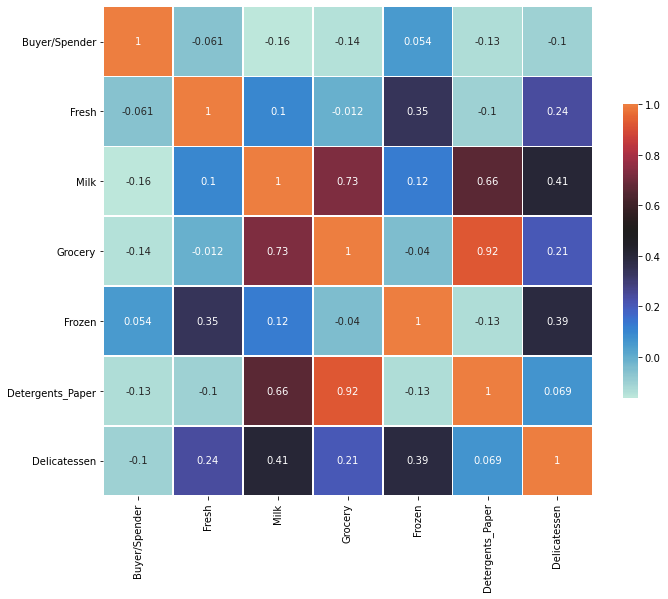

In [28]:
plt.figure(figsize=(11,9));
sns.heatmap(df.corr(),vmax=1, center=0.5, square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True);

* <i>There is strong correlation (0.92) between the "detergents and paper products" and the "grocery products"

### Descriptive Statistics for the dataset:

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


* Dataset has 440 rows and 9 variables out of which we will omit the Buyer/Spender variable apartfrom that, we have 8 variables Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen. 
* Channel and Region both are categorical columns while the remaining variables are of integer type.

### Check for Null  Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


 From the above results, it is evident that there are <b>no null values present</b> in the dataset.

In [4]:
#Making a copy of the Data
df2=df.copy()


In [5]:
del df2["Buyer/Spender"]

* Making a copy of the above data, excluding the Buyer/Spender Column

In [5]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


### Adding a "Total_Spending" Column for easy of calculation in future Questions

In [6]:
df2["Total_Spending"]=df2.Fresh+df2.Milk+df2.Grocery+df2.Frozen+df2.Detergents_Paper+df2.Delicatessen

In [7]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


## 1.1 Use methods of descriptive statistics to summarize data.
#### Which Region and which Channel seems to spend more? 
#### Which Region and which Channel seems to spend less?

In [8]:
print('Descriptive Statastics of our Data:')
df2.describe().T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total_Spending,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [10]:
print('Descriptive Statastics of our Data including Channel & Retail:')
df2.describe(include='all').T

Descriptive Statastics of our Data including Channel & Retail:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943
Total_Spending,440,NaN,NaN,NaN,33226.1,26356.3,904,17448.8,27492,41307.5,199891


* Measure of Central Tendency - Mean, Median, mode Measure of Dispersion - Range, IQR, Standard Deviation

* From the above two describe function, we can infer the following

* Channel has two unique values, with "Hotel" as most frequent with 298 out of 440 transactions. i.e 67.7 percentage of spending comes from "Hotel" channel.

* Retail has three unique values, with "Other" as most frequent with 316 out of 440 transactions. i.e.71.8 percentage of spending comes from "Other" region.


* Fresh item (440 records), has a mean of 12000.3, standard deviation of 12647.3, with min value of 3 and max value of 112151 .

* The other aspect is Q1(25%) is 3127.75, Q3(75%) is 16933.8, with Q2(50%) 8504

* range = max-min =112151-3=112,148 & IQR = Q3-Q1 = 16933.8-3127.75 = 13,806.05 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))


* Milk item (440 records), has a mean of 5796.27, standard deviation of 7380.38, with min value of 55 and max value of 73498.

* The other aspect is Q1(25%) is 1533, Q3(75%) is 7190.25, with Q2(50%) 3627

* range = max-min =73498-55=73443 & IQR = Q3-Q1 = 7190.25-1533 = 5657.25 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))


* Grocery item (440 records), has a mean of 7951.28, standard deviation of 9503.16, with min value of 3 and max value of 92780.

* The other aspect is Q1(25%) is 2153, Q3(75%) is 10655.8, with Q2(50%) 4755.5

* range = max-min =92780-3=92777 & IQR = Q3-Q1 = 10655.8-2153 = 8502.8 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))


* Frozen (440 records), has a mean of 3071.93, standard deviation of 4854.67, with min value of 25 and max value of 60869.

* The other aspect is Q1(25%) is 742.25, Q3(75%) is 3554.25, with Q2(50%) 1526

* range = max-min =60869-25=60844 & IQR = Q3-Q1 = 3554.25-742.25 = 2812 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))


* Detergents_Paper (440 records), has a mean of 2881.49, standard deviation of 4767.85, with min value of 3 and max value of 40827.

* The other aspect is Q1(25%) is 256.75, Q3(75%) is 3922, with Q2(50%) 816.5

* range = max-min =40827-3=40824 & IQR = Q3-Q1 = 3922-256.75 = 3665.25 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))


* Delicatessen (440 records), has a mean of 1524.87, standard deviation of 2820.11, with min value of 3 and max value of 47943.

* The other aspect is Q1(25%) is 408.25, Q3(75%) is 1820.25, with Q2(50%) 965.5

* range = max-min =47943-3=47940 & IQR = Q3-Q1 = 1820.25-408.25 = 1412 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))



In [35]:
print("Using Group_by function to easily summarize the Total_Spending with the Region")
x=df2.groupby(["Region"])["Total_Spending"].sum()
x


Using Group_by function to easily summarize the Total_Spending with the Region


Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Spending, dtype: int64

In [18]:
print("Using Group_by function to easily summarize the Total_Spending with Channel")
df2.groupby(["Channel"])["Total_Spending"].sum()


Using Group_by function to easily summarize the Total_Spending with Channel


Channel
Hotel     7999569
Retail    6619931
Name: Total_Spending, dtype: int64

### Highest spend in the Region is from Others and lowest spend in the region is from Oporto
### Highest spend in the Channel is from Hotel and lowest spend in the Channel is from Retail.

In [29]:
print("Using Group_by function to easily summarize the Total_Spending with Region and Channel")
df2.groupby(["Region","Channel"])["Total_Spending"].sum()

Using Group_by function to easily summarize the Total_Spending with Region and Channel


Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total_Spending, dtype: int64

## Inference:

<b> Highest</b> spend in the Region/Channel is from <b>Others/Hotel</b> <br>
<b> Lowest</b> spend in the Region/Channel is from <b>Oporto/Hotel</b>

In [11]:
data1 = df2.drop(columns=['Region'])
mean1 = data1.groupby('Channel').mean()
mean1.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Channel,,,,,,,
Hotel,13475.56,3451.72,3962.14,3748.25,790.56,1415.96,26844.19
Retail,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44,46619.23


### In Channel "Hotel" Average Highest Spending in Fresh items and Lowest Spending in Detergents_Paper.
### In Channel "Retail" Average Highest Spending in Grocery items and Lowest Spending in Frozen items.

In [12]:
data2 = df2.drop(columns=['Channel'])
mean2 = data2.groupby('Region').mean()
mean2.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Region,,,,,,,
Lisbon,11101.73,5486.42,7403.08,3000.34,2651.12,1354.9,30997.57
Oporto,9887.68,5088.17,9218.60,4045.36,3687.47,1159.7,33086.98
Other,12533.47,5977.09,7896.36,2944.59,2817.75,1620.6,33789.87


### In Region "Lisbon" Average Highest Spending in Fresh and Lowest in Delicatessen items.
### In Region "Oporto" Average Highest Spending in Fresh and Lowest in Delicatessen items.
### In Region "Other" Average Highest Spending in Fresh and Lowest in Delicatessen items.

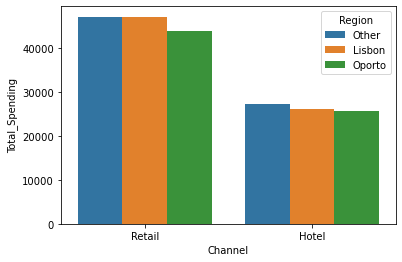

In [22]:
sns.barplot(y=df2["Total_Spending"],x=df2["Channel"],hue=df2["Region"],orient="v",ci=None);

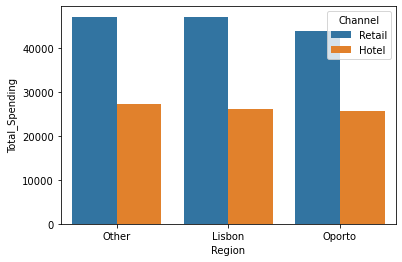

In [23]:
sns.barplot(y=df2["Total_Spending"],x=df2["Region"],hue=df2["Channel"],orient="v",ci=None);

#### <i>The Barplot Representation represents The Total Spending for each Region/Channel

## 1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

    

#### For different varieties we can recall the observations based on part 1.1 which summarizes the descriptive statistics of the Items present in the dataset.


* Further from that observations we will visually observe the behaviour.


* We observe behaviour in all items across Channel and Region use <b> Bar Plot</b>.

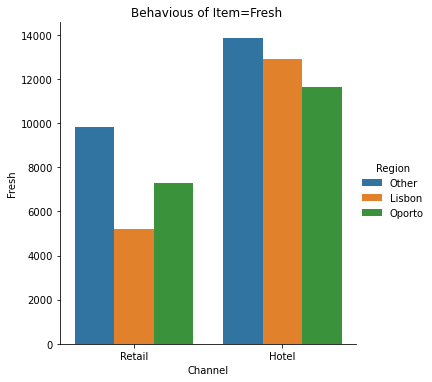

In [13]:
sns.catplot(x="Channel",y="Fresh",hue="Region",data=df2,kind='bar',ci=None);
plt.title("Behavious of Item=Fresh ");

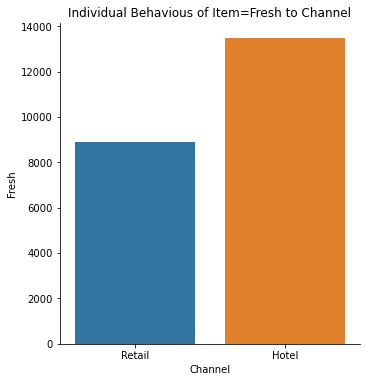

In [14]:
sns.catplot(x="Channel",y="Fresh",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Fresh to Channel");

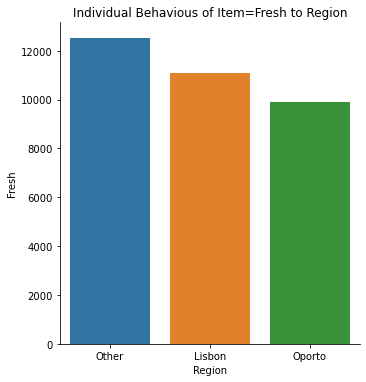

In [15]:
sns.catplot(x="Region",y="Fresh",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Fresh to Region");

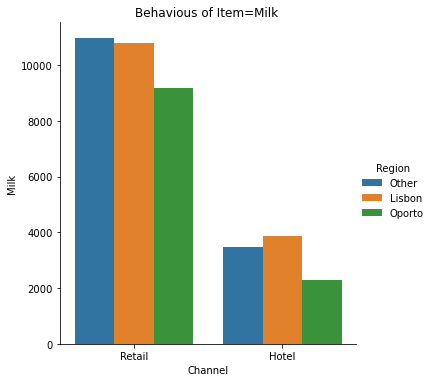

In [16]:
sns.catplot(x="Channel",y="Milk",hue="Region",data=df2,kind='bar',ci=None);
plt.title("Behavious of Item=Milk ");

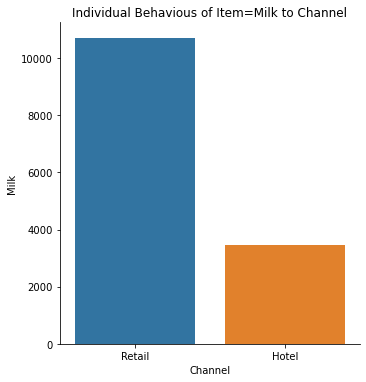

In [52]:
sns.catplot(x="Channel",y="Milk",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Milk to Channel");

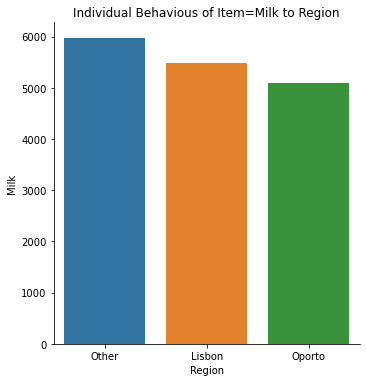

In [53]:
sns.catplot(x="Region",y="Milk",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Milk to Region");

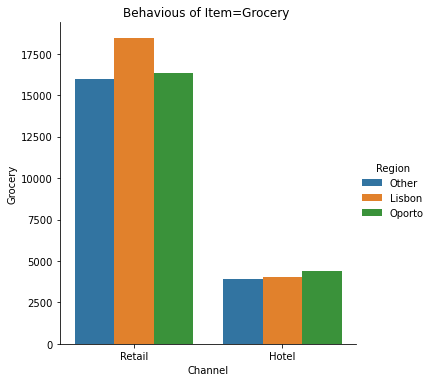

In [54]:
sns.catplot(x="Channel",y="Grocery",hue="Region",data=df2,kind='bar',ci=None);
plt.title("Behavious of Item=Grocery ");

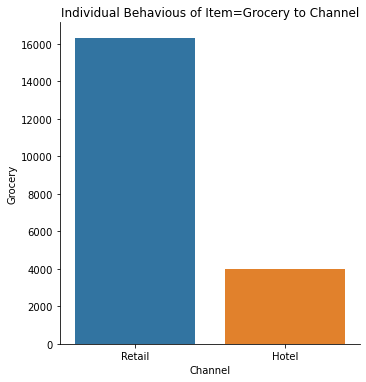

In [55]:
sns.catplot(x="Channel",y="Grocery",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Grocery to Channel");

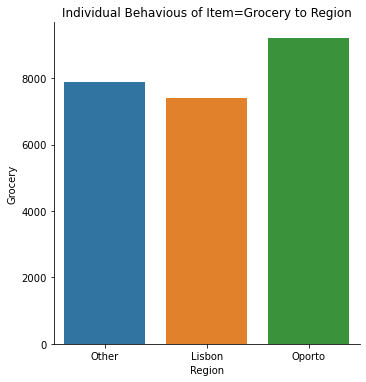

In [57]:
sns.catplot(x="Region",y="Grocery",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Grocery to Region");

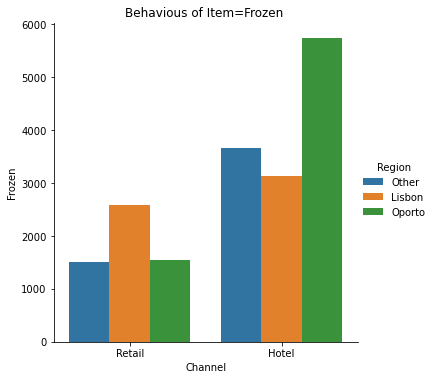

In [58]:
sns.catplot(x="Channel",y="Frozen",hue="Region",data=df2,kind='bar',ci=None);
plt.title("Behavious of Item=Frozen ");

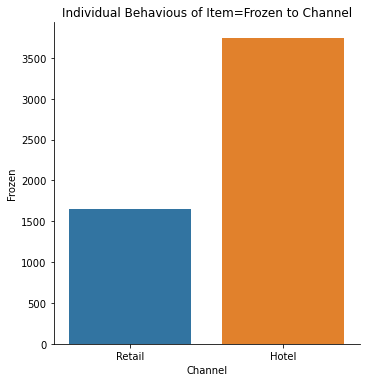

In [59]:
sns.catplot(x="Channel",y="Frozen",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Frozen to Channel");

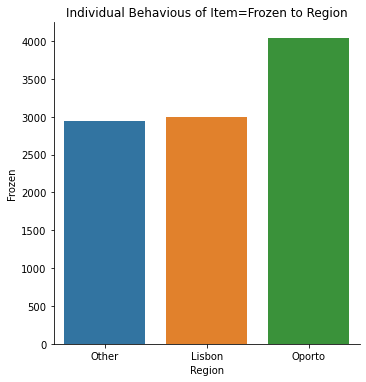

In [61]:
sns.catplot(x="Region",y="Frozen",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Frozen to Region");

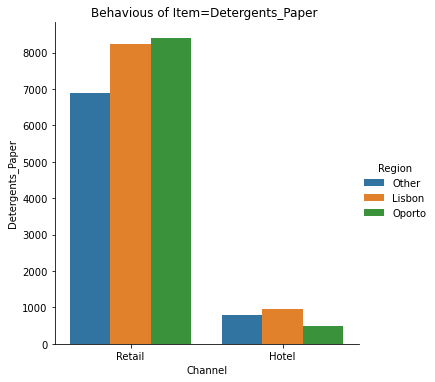

In [62]:
sns.catplot(x="Channel",y="Detergents_Paper",hue="Region",data=df2,kind='bar',ci=None);
plt.title("Behavious of Item=Detergents_Paper ");

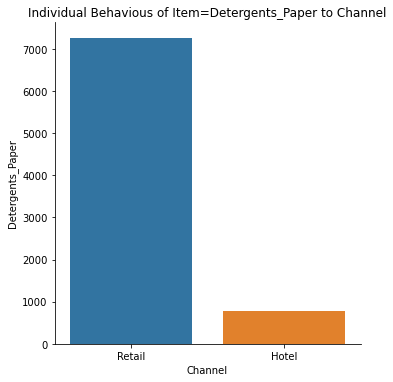

In [64]:
sns.catplot(x="Channel",y="Detergents_Paper",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Detergents_Paper to Channel");

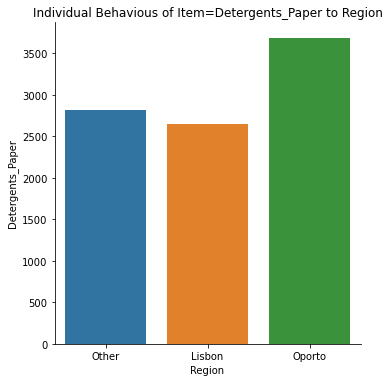

In [65]:
sns.catplot(x="Region",y="Detergents_Paper",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Detergents_Paper to Region");

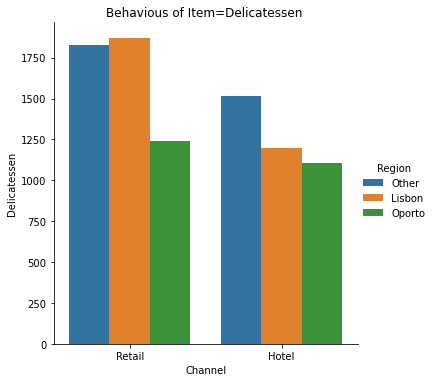

In [41]:
sns.catplot(x="Channel",y="Delicatessen",hue="Region",data=df2,kind='bar',ci=None);
plt.title("Behavious of Item=Delicatessen ");

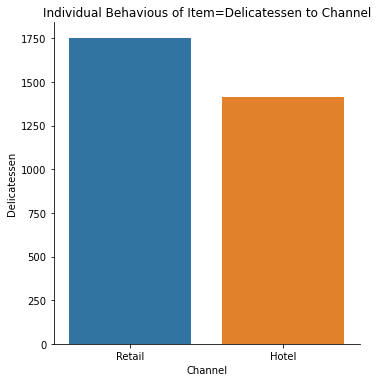

In [66]:
sns.catplot(x="Channel",y="Delicatessen",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Delicatessen to Channel");

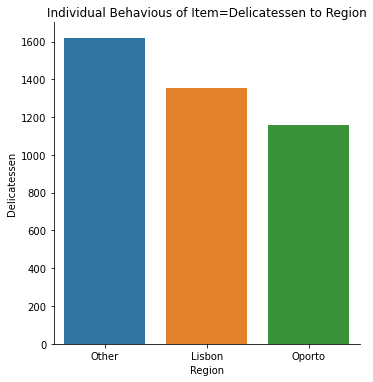

In [67]:
sns.catplot(x="Region",y="Delicatessen",data=df2,kind='bar',ci=None);
plt.title("Individual Behavious of Item=Delicatessen to Region");

## Inference:
*  From the visual representation as shown above, it can be easily concluded that <b>all 6 varieties show variably different behaviour</b> across Region and Channel and are <b>not similar</b>.


## 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?Which items shows the least inconsistent behaviour?

### Checking the behaviour using different techniques
* Based on **Standard Deviation**

In [69]:
df2.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total_Spending      26356.301730
dtype: float64



* Based on <b>Variance

In [70]:
df2.var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
Total_Spending      6.946546e+08
dtype: float64

* Based on <b>Coefficient of Variation</b> i.e. Standard Deviation/Mean

In [83]:
print("___Fresh___")
cv_f=df2['Fresh'].std()/df2['Fresh'].mean()
cv_f

___Fresh___


1.0539179237473149

In [84]:
print("___Milk___")
cv_m=df2['Milk'].std()/df2['Milk'].mean()
cv_m

___Milk___


1.2732985840065414

In [85]:
print("___Grocery___")
cv_g=df2['Grocery'].std()/df2['Grocery'].mean()
cv_g

___Grocery___


1.1951743730016824

In [86]:
print("___Frozen___")
cv_fr=df2['Frozen'].std()/df2['Frozen'].mean()
cv_fr

___Frozen___


1.5803323836352914

In [87]:
print("___Detergents_Paper___")
cv_dr=df2['Detergents_Paper'].std()/df2['Detergents_Paper'].mean()
cv_dr

___Detergents_Paper___


1.6546471385005155

In [88]:
print("___Delicatessen___")
cv_d=df2['Delicatessen'].std()/df2['Delicatessen'].mean()
cv_d

___Delicatessen___


1.8494068981158382

## Inference:

* To find the inconsistency, <b>Coefficient of Variation</b> is a better method instead of Standard Deviation as it takes into account the spread of the data from the mean of the population/data.

* Fresh item shows the least Inconsistent behaviour with a Coefficient of Variation of: <b>1.0539179237473149</b>.
* Delicatessen item shows the most inconsistent behaviour with a  Coefficient of Variation of: <b>1.8494068981158382.

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

* The best way to find outliers in using a boxplot.
* The black point is the outliers in boxplot graph.

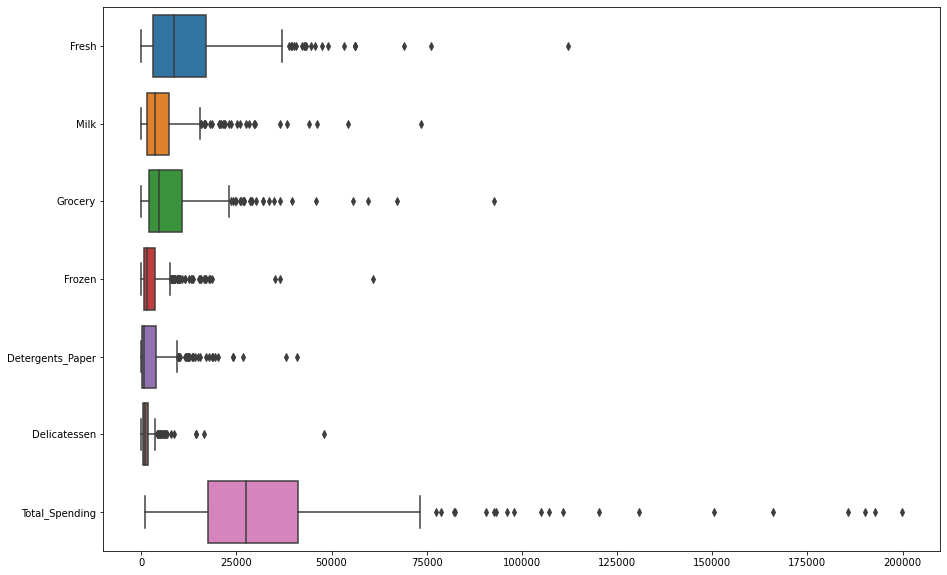

In [90]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df2, orient="h",);

* Yes there are outliers in all the items across the product range (Fresh, Milk, Grocery, Frozen, Detergents_Paper & Delicatessen), ignoring the Total_Spending variable here as it is just a summation of all other items therefore will obviously have outliers if there are outliers in other items.


* Outliers are detected but not necessarily removed, it depends of the situation. Here I will assume that we are provided  dataset with correct data, so I will keep them as is.

### We know that outliers exist, but for a better understanding lets check which points from the dataset acts as outliers.

In [13]:
f1=iqr(df2['Fresh'])
m=iqr(df2['Milk'])
g=iqr(df2['Grocery'])
f2=iqr(df2['Frozen'])
d1=iqr(df2['Detergents_Paper'])
d2=iqr(df2['Delicatessen'])

## Checking the Inter Quartile Range of the Items

In [14]:
print('IQR of Fresh item            ' + str(f1))
print('IQR of Milk item             ' + str(m))
print('IQR of Grocery item          ' + str(g))
print('IQR of Frozen item           ' + str(f2))
print('IQR of Detergents_Paper item ' + str(d1))
print('IQR of Delicatessen item     ' + str(d2))

IQR of Fresh item            13806.0
IQR of Milk item             5657.25
IQR of Grocery item          8502.75
IQR of Frozen item           2812.0
IQR of Detergents_Paper item 3665.25
IQR of Delicatessen item     1412.0


* Creating a user defined funnction out_iqr, which checks for the outliers points using the algorithm where the outliers are all those points which lie either in the lower bound or upper bound of the data, where :-

* Q1 is the First Quartile, i.e 25% value
* Q3 is the Third Quartile, i.e 75% value

### Lower_bound = Q1 - (1.5 * iqr) 
###  Upper_bound = Q3 + (1.5 * iqr)

In [15]:
def out_iqr(s, k=1.5, return_thresholds=False):
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

### Checking the boolean result obtained from the user defined function for first  values

In [22]:
# outlier_mask is a boolean list identifies the indices of the outliers
outliers = out_iqr(df2['Fresh'])
# first 10 elements
outliers[:10]

[False, False, False, False, False, False, False, False, False, False]

In [24]:
print("\nThe Following are the Outlier points present for Item = Fresh : ")
df2['Fresh'][outliers]


The Following are the Outlier points present for Item = Fresh : 


29      43088
39      56159
47      44466
52      40721
87      43265
103     56082
125     76237
129     42312
176     45640
181    112151
239     47493
258     56083
259     53205
282     49063
284     68951
285     40254
289     42786
370     39679
377     38793
436     39228
Name: Fresh, dtype: int64

In [25]:
print("\nThe Following are the Outlier points present for Item = Milk : ")
df2['Milk'][outliers]


The Following are the Outlier points present for Item = Milk : 


29      2100
39       555
47     54259
52      3916
87      5025
103     3504
125     3473
129      926
176     6958
181    29627
239     2567
258     4563
259     4959
282     3965
284     4411
285      640
289      286
370     3944
377     3154
436     1431
Name: Milk, dtype: int64

In [26]:
print("\nThe Following are the Outlier points present for Item = Grocery : ")
df2['Grocery'][outliers]


The Following are the Outlier points present for Item = Grocery : 


29      2609
39       902
47     55571
52      5876
87      8117
103     8906
125     7102
129     1510
176     6536
181    18148
239     3779
258     2124
259     7336
282     4252
284    12609
285     3600
289      471
370     4955
377     2648
436      764
Name: Grocery, dtype: int64

In [27]:
print("\nThe Following are the Outlier points present for Item = Frozen : ")
df2['Frozen'][outliers]


The Following are the Outlier points present for Item = Frozen : 


29      1200
39     10002
47      7782
52       532
87      6312
103    18028
125    16538
129     1718
176     7368
181    16745
239     5243
258     6422
259     3012
282     5970
284     8692
285     1042
289     1388
370     1364
377     1034
436     4510
Name: Frozen, dtype: int64

In [28]:
print("\nThe Following are the Outlier points present for Item = Detergents_Paper : ")
df2['Detergents_Paper'][outliers]


The Following are the Outlier points present for Item = Detergents_Paper : 


29      1107
39       212
47     24171
52      2587
87      1579
103     1480
125      778
129      410
176     1532
181     4948
239      828
258      730
259      967
282     1041
284      751
285      436
289       32
370      523
377       96
436       93
Name: Detergents_Paper, dtype: int64

In [29]:
print("\nThe Following are the Outlier points present for Item = Delicatessen : ")
df2['Delicatessen'][outliers]


The Following are the Outlier points present for Item = Delicatessen : 


29       823
39      2916
47      6465
52      1278
87     14351
103     2498
125      918
129     1819
176      230
181     8550
239     2253
258     3321
259      818
282     1404
284     2406
285       18
289       22
370     2235
377     1242
436     2346
Name: Delicatessen, dtype: int64

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

## Business Recommendations: 

* From our Data Analysis, it is observed that Others Region is the area of Total Spending under Hotel as a Channel, therefore there is a possibility to grow the business further in that area.


* <i>Apart from that it would be great to pay attention to the area where the Total Spending is the lowest i.e. the Hotels in Oporto, stating customers are not satisfied therefore regular surveys would be a great way to know more about customer expectations to improve the business there</i>.


* Observing the Items it is safe to conclude that Fresh Item is the best performing Item as it has the maximum mean value and lowest coefficient of variation out of all items, therefore it is one which is of the least risk to the business.


* Similarly, Delicatessen Item is the worst performing Item as it has the lowest mean value and highest coefficient of variation out of all items, therefore it is one which is of the maximum risk to the business therefore its better to remove that item if unable to improve it.


* Outliers are present in our dataset but we dont need to remove them where the items are performing well and are improving the business like Fresh, however it would be strongly recommended to remove them from the lowest performing item like Delicatessen as outliers might be one of the reasons for the item performing  the worst and it might just improve our observations if removed.


* Since Fresh is the best performing Item it should be observed frequently to prevent variations and more emphasis should be given to bring it up to the mark with the Hotel Channel as Retail is where Fresh lacks behind.


* Also more emphasis should be given to the items having the strongest correlation like between the "detergents and paper products" and the "grocery products" and between "Grocery" and "Milk".




# Problem 2 - 

### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set)

### Exploratory Data Analysis

In [3]:
cmsu=pd.read_csv("Survey.csv")
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


### Descriptive Statistics for the dataset:

In [19]:
cmsu.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


### Insights:  
* Dataset has 62 rows and 14 variables ID, Gender, Age, Class, Major, Grad Intension, GPA, Employment, Salary, Social Networking, Satisfaction,Spending, Computer, Text Messages.
* Gender, Class, Major, Grad Intension, Employment, Computer are categorical columns. ID, Age, Social Networking, Satisfaction,Spending, Text Messages are integer type while GPA and Salary are of float type

### Checking for Null Values

In [20]:
cmsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


* From the above results, it is evident that there are <b>no null values present</b> in the dataset.

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [4]:
gm=pd.crosstab(cmsu["Gender"],cmsu["Major"],margins=True)
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [5]:
gg=pd.crosstab(cmsu["Gender"],cmsu["Grad Intention"],margins=True)
gg

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Gender and Employment

In [6]:
ge=pd.crosstab(cmsu["Gender"],cmsu["Employment"],margins=True)
ge

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4. Gender and Computer

In [7]:
gc=pd.crosstab(cmsu["Gender"],cmsu["Computer"],margins=True)
gc

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


* Above are the contingency tables of Gender with respect to other variables

## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

* Total Students = 62
* Checking the count of males to female in the Gender column

In [45]:
cmsu["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [22]:
print("The Probability that a randomly selected CMSU student will be male is : " , round(29/62,2))

The Probability that a randomly selected CMSU student will be male is :  0.47


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [23]:
print("The Probability that a randomly selected CMSU student will be female is: " , round(33/62,2))

The Probability that a randomly selected CMSU student will be female is:  0.53


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

* Conditional probability refers to the chances that some outcome occurs given that another event has also occurred.
* It is often stated as the probability of B given A and is written as P(B|A), where the probability of B depends on that of A happening.
* Conditional probability can be contrasted with unconditional probability.


* In our Case since we are given that the student is a male, therefore, our <b>A = Male and B = Different Majors
    

* The formula for conditional probability is:

    * <b>P(B|A) = P(A and B) / P(A)</b>

* which you can also rewrite as:

    * <b>P(B|A) = P(A∩B) / P(A)</b>


* Where <b>P(A∩B) can be written as P(A)*P(B|A) or P(B)*P(A|B)
    
 
* Substituting the Values of Different Majors and calculating the Conditional Probability as follows :

* As Calculated above,

<b>P(Male)=29/62 = 0.47
    
  P(Female)=33/62 = 0.53

In [26]:
print("Calling the Contingency Table of Gender with respect to Major for our reference.")
gm

Calling the Contingency Table of Gender with respect to Major for our reference.


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [112]:
#P(Accounting|male)=P(male|Accounting)*P(Accounting)/P(male)
p_agm=round((4/7*7/62)/0.47,3)
print("The conditional probability of Accounting among the male students in CMSU is: ",p_agm)

The conditional probability of Accounting among the male students in CMSU is:  0.137


In [105]:
#P(CIS|male)=P(male|CIS)*P(CIS)/P(male)
p_cgm=round((1/62)/0.47,3)
print("The conditional probability of CIS among the male students in CMSU is: ",p_cgm)

The conditional probability of CIS among the male students in CMSU is:  0.034


In [124]:
#P(Eco|male)=P(male|eco)*P(Eco)/P(male)
p_egm=round((4/62)/0.47,3)
print("The conditional probability of Economics/Finance among the male students in CMSU is: ",p_egm)

The conditional probability of Economics/Finance among the male students in CMSU is:  0.137


In [107]:
#P(IB|male)=P(male|IB)*P(IB)/P(male)
p_igm=round((2/62)/0.47,3)
print("The conditional probability of International/Business among the male students in CMSU is: ",p_igm)

The conditional probability of International/Business among the male students in CMSU is:  0.069


In [108]:
#P(Management|male)=P(male|Management)*P(management)/P(male)
p_mgm=round((6/62)/0.47,3)
print("The conditional probability of Management among the male students in CMSU is: ",p_mgm)

The conditional probability of Management among the male students in CMSU is:  0.206


In [109]:
#P(other|male)=P(male|other)*P(Other)/P(male)
p_ogm=round((4/62)/0.47,3)
print("The conditional probability of Others among the male students in CMSU is: ",p_ogm)

The conditional probability of Others among the male students in CMSU is:  0.137


In [110]:
#P(Retail|male)=P(male|retail)*P(retail)/P(male)
p_rgm=round((5/62)/0.47,3)
print("The conditional probability of Retail among the male students in CMSU is: ",p_rgm)

The conditional probability of Retail among the male students in CMSU is:  0.172


In [111]:
#P(Undecided|male)=P(male|undecided)*P(undecided)/P(male)
p_ugm=round((3/62)/0.47,3)
print("The conditional probability of Undecided among the male students in CMSU is:- ",p_ugm)

The conditional probability of Undecided among the male students in CMSU is:-  0.103


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [114]:
#P(Accounting|female)=P(female|Accounting)*P(Accounting)/P(female)
p_agf=round((3/7*7/62)/0.53,3)
print("The conditional probability of Accounting among the female students in CMSU is: ",p_agf)

The conditional probability of Accounting among the female students in CMSU is:  0.091


In [116]:
#P(CIS|female)=P(female|CIS)*P(CIS)/P(female)
p_cgf=round((3/62)/0.53,3)
print("The conditional probability of CIS among the female students in CMSU is: ",p_cgf)

The conditional probability of CIS among the female students in CMSU is:  0.091


In [117]:
#P(Eco|female)=P(female|eco)*P(Eco)/P(female)
p_egf=round((7/62)/0.53,3)
print("The conditional probability of Economics/Finance among the female students in CMSU is: ",p_egf)

The conditional probability of Economics/Finance among the female students in CMSU is:  0.213


In [9]:
#P(IB|female)=P(female|IB)*P(IB)/P(female)
p_igf=round((4/62)/0.53,3)
print("The conditional probability of International/Business among the male students in CMSU is: ",p_igf)

The conditional probability of International/Business among the male students in CMSU is:  0.122


In [8]:
#P(Management|female)=P(female|Management)*P(management)/P(female)
p_mgf=round((4/62)/0.53,3)
print("The conditional probability of Management among the female students in CMSU is: ",p_mgf)

The conditional probability of Management among the female students in CMSU is:  0.122


In [120]:
#P(other|female)=P(female|other)*P(Other)/P(female)
p_ogf=round((3/62)/0.53,3)
print("The conditional probability of Others among the female students in CMSU is: ",p_ogf)

The conditional probability of Others among the female students in CMSU is:  0.091


In [121]:
#P(Retail|female)=P(female|retail)*P(retail)/P(female)
p_rgf=round((9/62)/0.53,3)
print("The conditional probability of Retail among the female students in CMSU is: ",p_rgf)

The conditional probability of Retail among the female students in CMSU is:  0.274


In [12]:
#P(Undecided|female)=P(female|undecided)*P(undecided)/P(female)
p_ugf=round((0/62)/0.53,3)
print("The conditional probability of Undecided among the female students in CMSU is: ",p_ugf)

The conditional probability of Undecided among the female students in CMSU is:  0.0


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [7]:
gg

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


* Formula Used = P(Yes|male)=P(male|Yes)*P(Yes)/P(male)

where 
      
      Total Students = 62
      
      Total Student who intend to graduate = 28
      
      P(Male) = 0.47
      
      P(Yes) = 28/62
      
      P(Male|Yes) = 17/28

In [11]:
p_ygm=round((17/28*28/62)/0.47,3)
print("The probability that a randomly chosen student is a male and intends to graduate is: ",p_ygm)

The probability that a randomly chosen student is a male and intends to graduate is:  0.583


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [9]:
gc

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


* Formula Used : P(NoLaptop|female)=P(female|NoLaptop)*P(NoLaptop)/P(female)
 
 where,
 
     Total Students = 62
 
     P(Female) = 0.53
 
     ToTal Students with No Laptop = 5+2 = 7
 
     P(Female|NoLaptop) = 4/7
 
     P(NoLaptop) = 7/62

In [13]:
p_ngf=round((4/7*7/62)/0.53,3)
print("The probability that a randomly selected student is a female and does NOT have a laptop is: ",p_ngf)

The probability that a randomly selected student is a female and does NOT have a laptop is:  0.122


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [14]:
ge

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


Formula Used:  P(A∪B)=P(A)+P(B)−P(A∩B)

    Where A = Male, B= Full-time Employment
    P(A)=0.47
    P(B)=10/62
    P(A∩B)=7/62
    
    we are subtracting the intersection since this is the value which is presented in both and is repeated,  therefore subtracting it is important.

In [1]:
#P(Male)=0.47
p_full=10/62
p_mintf=7/62
print("The probability that a randomly chosen student is either a male or has full-time employment is: ",round(0.47+p_full-p_mintf,3))

The probability that a randomly chosen student is either a male or has full-time employment is:  0.518


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [21]:
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


* For this we will directly used the probability calculated in part 2.3, where We individually calculated the probability  of a female choosing differengt majors.
* Taking the <b>Probability of a female choosing International Business and adding it to the Probability of a female choosing Management, since they are mutually exclusive events therefore we dont need to subtract anything as there is no common value.

In [10]:
print("Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management is: ",p_igf+p_mgf)

Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management is:  0.244


## 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

* <b>Checking the Original Contingency table

In [41]:
gg

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


* <b>Making a Copy of the original Contingency Table

In [40]:
gg1=pd.crosstab(cmsu["Gender"],cmsu["Grad Intention"])
gg1

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


* <b> Removing the Undecided Column and Reading The Dataset Again

In [36]:
del gg1["Undecided"]

In [37]:
gg1

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


#### Checking if the Graduate Intension and being female are independent events
* To check we need to calculate the probability of intersection of the events , and
* If the intersection probability is equal to the product of individual probability then they are independent, else they are not


* Let F = being female and let G = Graduate Intension.


* Check if P(F AND G) = P(F) * P(G).


* If P(F AND G) = P(F) * P(G), then F and G are independent.
* If P(F AND G) ≠ P(F) * P(G), then F and G are not independent.

    * P(F)=0.53
    * P(G)=40/62
    * P(F And G) =20/40

In [45]:
p_f=0.53
p_g=round(40/62,3)
p_fintg=20/40
print("P(F AND G) = " , p_fintg)
print("P(F)*P(G) = " , round(p_f*p_g,3))

P(F AND G) =  0.5
P(F)*P(G) =  0.342


### Inference:- 

* <b>Since The condition is not satisfied then we can successfully say that the Graduate Intension and being female are dependent events.

## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [46]:
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


*  Extracting Only Those Values Where our Condition is satisfied, i.e. <b>GPA < 3 and Taking a count of those values

In [71]:
cmsu[cmsu["GPA"]<3].count()

ID                   17
Gender               17
Age                  17
Class                17
Major                17
Grad Intention       17
GPA                  17
Employment           17
Salary               17
Social Networking    17
Satisfaction         17
Spending             17
Computer             17
Text Messages        17
dtype: int64

### Observations

* Here we observe that 
* Total number of students = 62
* Number of students’ GPA less than 3 = 17
* Probability student’s GPA less than 3 = 17/62

 

In [11]:
print("P (GPA < 3.0) = 17/62 = ",round(17/62,3))

P (GPA < 3.0) = 17/62 =  0.274


### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [75]:
gi=pd.crosstab(cmsu["Gender"],cmsu["Salary"],margins=True)
gi

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


* Total number of students = 62
* 1.Number of males = 29 
* Number of males ∩ salary greater than 50 = 14
* Probability males’ salary greater than 50 = 14/62
* Probability Male = 29/62
* Probability salary greater than 50 males = (Probability males ∩ salary greater than 50)/ (Probability Male)
* Probability salary greater than 50 males = 14/29


#### P (Salary >= 50|Male) = 0.4832


* 2. Number of females = 33 
* Number of females ∩ salary greater than 50 = 18
* Probability females’ salary greater than 50 = 18/62
* Probability Females = 33/62
* Probability salary greater than 50 females = (Probability females ∩ salary greater than 50)/ (Probability Females)
* Probability salary greater than 50 females = 18/33


#### P (Salary >= 50|Females) = 0.545

### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

* The Best Way to Check is the data is normally distributed is to Plot a Density Plot which is like a Histogram with joining the <b>continuous data and calculating the Probability Density of the Data
    

* The Box Plot is Drawn to Crosscheck as incase outliers are present and to visually observe the Skewness in the Data since then Data would not be Normally Distributed.
    
Skewness here refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.

In [11]:
import warnings
warnings.filterwarnings("ignore")

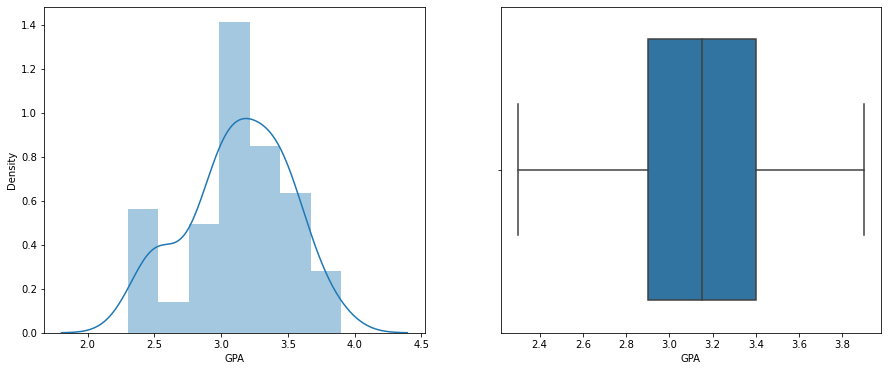

In [127]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(cmsu["GPA"],kde=True);

plt.subplot(1,2,2)
sns.boxplot(cmsu["GPA"]);


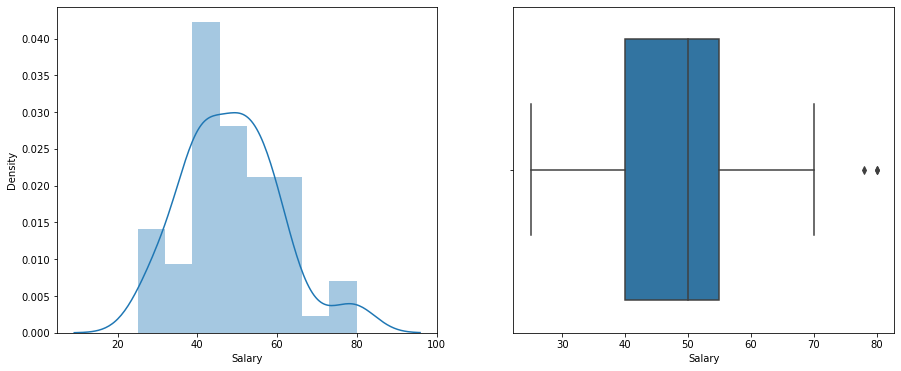

In [128]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(cmsu["Salary"],kde=True);

plt.subplot(1,2,2)
sns.boxplot(cmsu["Salary"]);

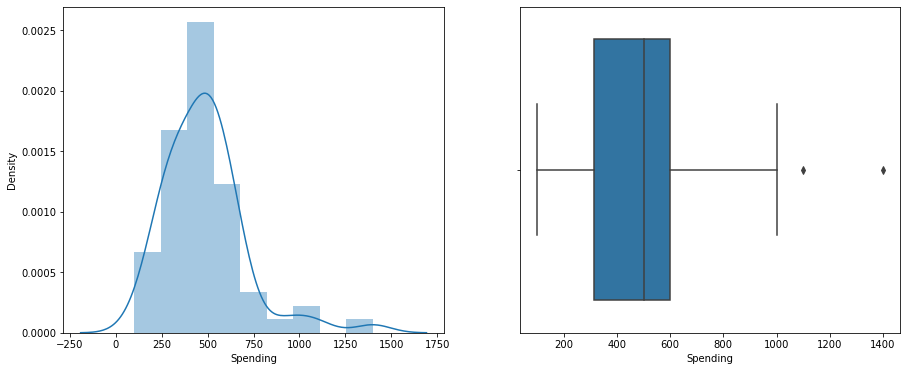

In [129]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(cmsu["Spending"],kde=True);

plt.subplot(1,2,2)
sns.boxplot(cmsu["Spending"]);

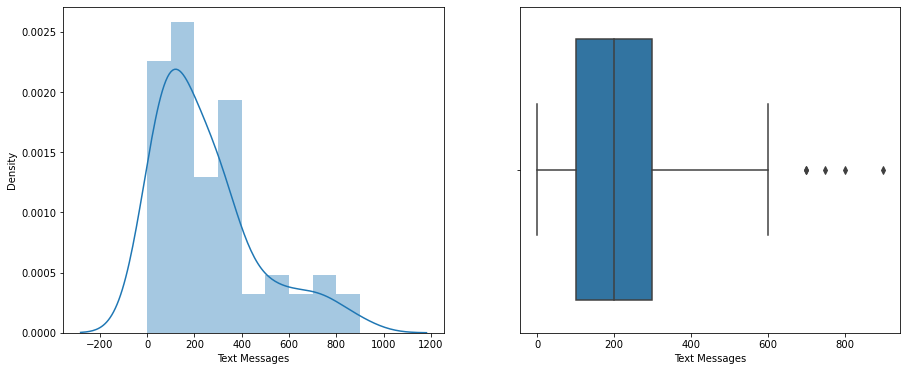

In [130]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(cmsu["Text Messages"],kde=True);

plt.subplot(1,2,2)
sns.boxplot(cmsu["Text Messages"]);

## Inference:


* The GPA box plot is <b>Normally distributed</b> as the whiskers of the box plot are of the same length, whereas

*  The box plots of <b>Salary, Spending, Text Messages have different whisker length and some Skewness is also present in the Data and hence are NOT Normally distributed.




## 2.8.2 Write a note summarizing your conclusions.

## Conclusion.

* From our Previous Observations we can infer that male students have a greater inclination towards Management as a major whereas female students are more inclined towards Retail and Economics as major.

* The Majority of the male students have decided to Graduate whereas thats not the case with the female students where a majority of them still havent decided if they want to graduate or not.

* The best part is that most of the students both male and female have access to Laptops therefore have information readily availiable with them.

* Most of the students are dependent on Part-Time Jobs with none of the female students being unemployed. 

* Finally it is safe to conclude by stating that students are performing well in Academics with around 75% students having GPA > 3 which can also be visualized as the GPA variable is following a normal distribution.


## Problem 3

* An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

## Exploratory Data Analysis

In [12]:
shingles=pd.read_csv("A+&+B+shingles.csv")
shingles.head()


,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


### Checking for Missing Values

In [14]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [13]:
shingles.isnull().sum()


A    0
B    5
dtype: int64

* <b> As we can Observe, Shingles A has 36 values and No missing Values, Shingles B has 31 Values, and 5 are Missing, both A and B are of float type.

## Descriptive Statistics for the Dataset

In [15]:
shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

##  Define null and alternative hypothesis


* Ho (Null Hypothesis) = Mean moisture content is >= 0.35 pound per 100 square feet.
* Ha (Alternative Hypothesis) = Mean moisture content is < 0.35 pound per 100 square feet.

Since alpha ( significance level ) is not given, we assume it to be 0.05.

For This Part We will be Performing a 1 sample T-Test which will give us the Test Statistics of the Data and the corresponding p-value which is the likelihood assuming the null hypothesis is true. 

Do keep in mind to divide the p-value by 2 as this test gives us the value considering both sides from the mean in the bell curve.


### Testing the Hypothesis for Shingles A

In [29]:
t_statistic, p_value = ttest_1samp(shingles.A, 0.35)

print('One sample t test for A\nt_statistic: {0} \np_value: {1} '.format(t_statistic, p_value/2))

One sample t test for A
t_statistic: -1.4735046253382782 
p_value: 0.07477633144907513 


## Decide to reject or accept null hypothesis

If the p-value obtained after performing the test is found to be less than alpha, i.e if p-value < 0.05.

We can conclude by stating that we have <b>sufficient evidence</b> from the data to reject the Null Hypothesis (Ho) and can successfully reject Ho.

If the p-value obtained after performing the test is found to be greater than alpha, i.e if p-value > 0.05.

We can conclude by stating that we have <b>insufficient evidence</b> from the data to reject the Null Hypothesis (Ho) therefore the null hypothesis stays true.

In [28]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('\n We have evidence to reject the null hypothesis since p value < Level of significance \n')
else:
    print('\n Insufficient evidence to reject the null hypothesis since p value > Level of significance \n') 

print ("Our one-sample t-test p-value=", p_value/2)

Level of significance: 0.05

 Insufficient evidence to reject the null hypothesis since p value > Level of significance 

Our one-sample t-test p-value= 0.07477633144907513


## Inference: 
* Since p_value > 0.05, do not reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet. p-value = 0.0748. If the population mean moisture content is in fact no less than 0.35 pounds per 100 square feet, the probability of observing a sample of 36 shingles that will result in a sample mean moisture content of 0.3167 pounds per 100 square feet or less is .0748.

### Testing the Hypothesis for Shingles B

In [31]:
t_statistic, p_value = ttest_1samp(shingles.B, 0.35,nan_policy="omit")

print('One sample t test for B\nt_statistic: {0} \np_value: {1} '.format(t_statistic, p_value/2))

One sample t test for B
t_statistic: -3.1003313069986995 
p_value: 0.0020904774003191826 


## Decide to reject or accept null hypothesis

If the p-value obtained after performing the test is found to be less than alpha, i.e if p-value < 0.05.

We can conclude by stating that we have <b>sufficient evidence</b> from the data to reject the Null Hypothesis (Ho) and can successfully reject Ho.

If the p-value obtained after performing the test is found to be greater than alpha, i.e if p-value > 0.05.

We can conclude by stating that we have <b>insufficient evidence</b> from the data to reject the Null Hypothesis (Ho) therefore the null hypothesis stays true.

In [33]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('\n We have evidence to reject the null hypothesis since p value < Level of significance \n')
else:
    print('\n Insufficient evidence to reject the null hypothesis since p value > Level of significance \n') 

print ("Our one-sample t-test p-value=", p_value/2)

Level of significance: 0.05

 We have evidence to reject the null hypothesis since p value < Level of significance 

Our one-sample t-test p-value= 0.0020904774003191826


## Inference:
* Since p_value < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. p-value = 0.0021. If the population mean moisture content is in fact no less than 0.35pounds per 100 square feet, the probability of observing a sample of 31 shingles that will result in a sample mean moisture content of 0.2735 pounds per 100 square feet or less is .0021.

## 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

## Defining the null and alternative hypothesis

* H0 : μ(A)= μ(B)  (the Population Means for  both shingles A and B are equal)

* Ha : μ(A)!= μ(B)  (the Population Means for  both shingles A and B are not equal)

Here we will perform a 2 sample t-test to check for if the null hypothesis holds true or not.

Since this is a 2-sample  test we do not need to divide p-value by 2.


In [19]:
alpha=0.05
t_statistic,p_value=ttest_ind(shingles['A'],shingles['B'],equal_var=True ,nan_policy='omit')  

print("t_statistic = {0}\np_value = {1}".format(t_statistic,p_value,))

t_statistic = 1.2896282719661123
p_value = 0.2017496571835306


## Inference: 

* As the pvalue > α , do not reject H0; and we can say that population mean for shingles A and B are equal 

## Test Assumptions:

* When running a two-sample t-test, the basic assumptions are: 
 

* <b>Independence of the observations</b> Each subject should belong to only one group. There is no relationship between the observations in each group.

* <b>No significant outliers in the two groups

* Normality</b>. the data for each group should be approximately normally distributed.

* <b>Homogeneity of variances</b> the variance of the outcome variable should be equal in each group.


* If those assumptions are not likely to be met, another testing procedure could be use.